# Data augmentation
random rotations, noise, random flipping 

In [43]:
# Dependencies
%pip install numpy
%pip install pyvista
%pip install "pyvista[jupyter]" 
%pip install trame ipywidgets
%pip install matplotlib
%pip install torch torchvision torchaudio
%pip install nnunetv2
%pip install simpleitk
%pip install os
%pip install json
%pip install nibabel
%pip install monai
%pip install torchio


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadat

In [44]:
import numpy as np
import SimpleITK as sitk
import pyvista as pv
import matplotlib.pyplot as plt
import os
import json

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

from monai.apps.auto3dseg import AutoRunner
from monai.config import print_config
from monai.data import create_test_image_3d

print_config()

MONAI version: 1.4.0
Numpy version: 1.26.4
Pytorch version: 2.3.1+cu118
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 46a5272196a6c2590ca2589029eed8e4d56ff008
MONAI __file__: /home/<username>/.local/lib/python3.10/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: 5.4.2
Nibabel version: 5.3.2
scikit-image version: 0.25.2
scipy version: 1.15.2
Pillow version: 11.1.0
Tensorboard version: 2.14.1
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.18.1+cu118
tqdm version: 4.67.1
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 7.0.0
pandas version: 2.2.3
einops version: 0.8.1
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: 2.21.0
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.

# Loading in the data

In [45]:




sim_datalist = {
    "testing": [
        {"image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_001_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_001.nrrd"},
        {"image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_002_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_002.nrrd"},
    ],
    "training": [
        {"fold": 0, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_003_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_003.nrrd"},
        {"fold": 0, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_004_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_004.nrrd"},
        {"fold": 0, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_005_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_005.nrrd"},
        {"fold": 0, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_006_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_006.nrrd"},
        {"fold": 0, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_007_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_007.nrrd"},
        {"fold": 0, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_008_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_008.nrrd"},
        {"fold": 1, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_009_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_009.nrrd"},
        {"fold": 1, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_010_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_010.nrrd"},
        {"fold": 1, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_011_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_011.nrrd"},
        {"fold": 1, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_012_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_012.nrrd"},
        {"fold": 1, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_013_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_013.nrrd"},
        {"fold": 1, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_014_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_014.nrrd"},
        {"fold": 2, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_015_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_015.nrrd"},
        {"fold": 2, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_016_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_016.nrrd"},
        {"fold": 2, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_017_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_017.nrrd"},
        {"fold": 2, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_018_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_018.nrrd"},
        {"fold": 2, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_019_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_019.nrrd"},
        {"fold": 2, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_020_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_020.nrrd"},
    ],
}

sim_dim = (64, 64, 64)


In [52]:




sim_datalist = {
    "testing": [
        {"image": "ROI_cropping/ROI_crops_Normal_CTCA/ROI_volume1.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_001.nrrd"},
        {"image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume2.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_002.nrrd"},
    ],
    "training": [
        {"fold": 0, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume3.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation3.nrrd"},
        {"fold": 0, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume4.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation4.nrrd"},
        {"fold": 0, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume5.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation5.nrrd"},
        {"fold": 0, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume6.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation6.nrrd"},
        {"fold": 0, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume7.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation7.nrrd"},
        {"fold": 0, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume8.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation8.nrrd"},
        {"fold": 1, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume9.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation9.nrrd"},
        {"fold": 1, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume10.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation10.nrrd"},
        {"fold": 1, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume11.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation11.nrrd"},
        {"fold": 1, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume12.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation12.nrrd"},
        {"fold": 1, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume13.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation13.nrrd"},
        {"fold": 1, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume14.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation14.nrrd"},
        {"fold": 2, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume15.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation15.nrrd"},
        {"fold": 2, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume16.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation16.nrrd"},
        {"fold": 2, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume17.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation17.nrrd"},
        {"fold": 2, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume18.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation18.nrrd"},
        {"fold": 2, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume19.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation19.nrrd"},
        {"fold": 2, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume20.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation20.nrrd"},
        {"fold": 0, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume3.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation3.nrrd"},
        {"fold": 0, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume4.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation4.nrrd"},
        {"fold": 0, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume5.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation5.nrrd"},
        {"fold": 0, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume6.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation6.nrrd"},
        {"fold": 0, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume7.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation7.nrrd"},
        {"fold": 0, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume8.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation8.nrrd"},
        {"fold": 1, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume9.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation9.nrrd"},
        {"fold": 1, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume10.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation10.nrrd"},
        {"fold": 1, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume11.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation11.nrrd"},
        {"fold": 1, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume12.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation12.nrrd"},
        {"fold": 1, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume13.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation13.nrrd"},
        {"fold": 1, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume14.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation14.nrrd"},
        {"fold": 2, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume15.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation15.nrrd"},
        {"fold": 2, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume16.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation16.nrrd"},
        {"fold": 2, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume17.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation17.nrrd"},
        {"fold": 2, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume18.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation18.nrrd"},
        {"fold": 2, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume19.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation19.nrrd"},
        {"fold": 2, "image": "ROI_cropping/ROI_crops_Diseased_CTCA/ROI_volume20.nrrd", "label": "ROI_cropping/ROI_crops_Normal_annotations/ROI_annotation20.nrrd"},
    ],
}



In [51]:
#shape checken
import torchio as tio

def print_shapes(dataset_split):
    print(f"\n--- {dataset_split.upper()} DATA ---")
    for idx, sample in enumerate(sim_datalist[dataset_split]):
        image_path = sample['image']
        label_path = sample['label']
        try:
            image = tio.ScalarImage(image_path)
            label = tio.LabelMap(label_path)
            print(f"Sample {idx + 1}:")
            print(f"  Image shape: {image.shape} (C, H, W, D)")
            print(f"  Label shape: {label.shape}")
        except Exception as e:
            print(f"  Error loading sample {idx + 1}: {e}")

# Run for both sets
print_shapes('training')
print_shapes('testing')



--- TRAINING DATA ---
Sample 1:
  Image shape: (1, 367, 329, 216) (C, H, W, D)
  Label shape: (1, 365, 323, 208)
Sample 2:
  Image shape: (1, 285, 276, 224) (C, H, W, D)
  Label shape: (1, 378, 294, 196)
Sample 3:
  Image shape: (1, 390, 342, 224) (C, H, W, D)
  Label shape: (1, 380, 329, 201)
Sample 4:
  Image shape: (1, 348, 305, 224) (C, H, W, D)
  Label shape: (1, 376, 336, 197)
Sample 5:
  Image shape: (1, 368, 304, 224) (C, H, W, D)
  Label shape: (1, 355, 280, 202)
Sample 6:
  Image shape: (1, 399, 300, 217) (C, H, W, D)
  Label shape: (1, 383, 291, 206)
Sample 7:
  Image shape: (1, 331, 296, 210) (C, H, W, D)
  Label shape: (1, 363, 316, 205)
Sample 8:
  Image shape: (1, 423, 327, 224) (C, H, W, D)
  Label shape: (1, 369, 325, 209)
Sample 9:
  Image shape: (1, 299, 283, 224) (C, H, W, D)
  Label shape: (1, 449, 364, 212)
Sample 10:
  Image shape: (1, 401, 306, 224) (C, H, W, D)
  Label shape: (1, 378, 313, 192)
Sample 11:
  Image shape: (1, 360, 310, 199) (C, H, W, D)
  Label 

In [36]:
import torchio as tio
import random

sim_dim = (256, 256, 256)
target_spacing = (0.5, 0.5, 0.5)

# Define the torchio transform pipeline
transform = tio.Compose([
    tio.ToCanonical(),                      # Ensure consistent orientation
    tio.Resample(target_spacing, image_interpolation='nearest'),           # Match spacing for all images/labels
    tio.CropOrPad(sim_dim),                 # Fix shape
    tio.RandomElasticDeformation(p=0.3),
    tio.RandomNoise(p=0.3),
    tio.RandomFlip(axes=('LR',), p=0.5),
    tio.RandomAffine(scales=(0.9, 1.1), degrees=10, translation=5, p=0.4),
    tio.RandomGamma(log_gamma=(-0.3, 0.3), p=0.3),
])

# Helper function to apply augmentation to a sample
def load_and_augment(image_path, label_path):
    # Load image and label separately
    image = tio.ScalarImage(image_path)
    label = tio.LabelMap(label_path)

    # Resample label to match image in spacing, origin, and orientation
    label = tio.Resample(image, image_interpolation='nearest')(label)

    # Create subject now that both are in the same space
    subject = tio.Subject(image=image, label=label)

    # Apply augmentations
    transformed = transform(subject)
    return transformed.image, transformed.label


augmented_dataset = []

for sample in sim_datalist['training']:
    image_path = sample['image']
    label_path = sample['label']
    aug_image, aug_label = load_and_augment(image_path, label_path)
    augmented_dataset.append((aug_image, aug_label))


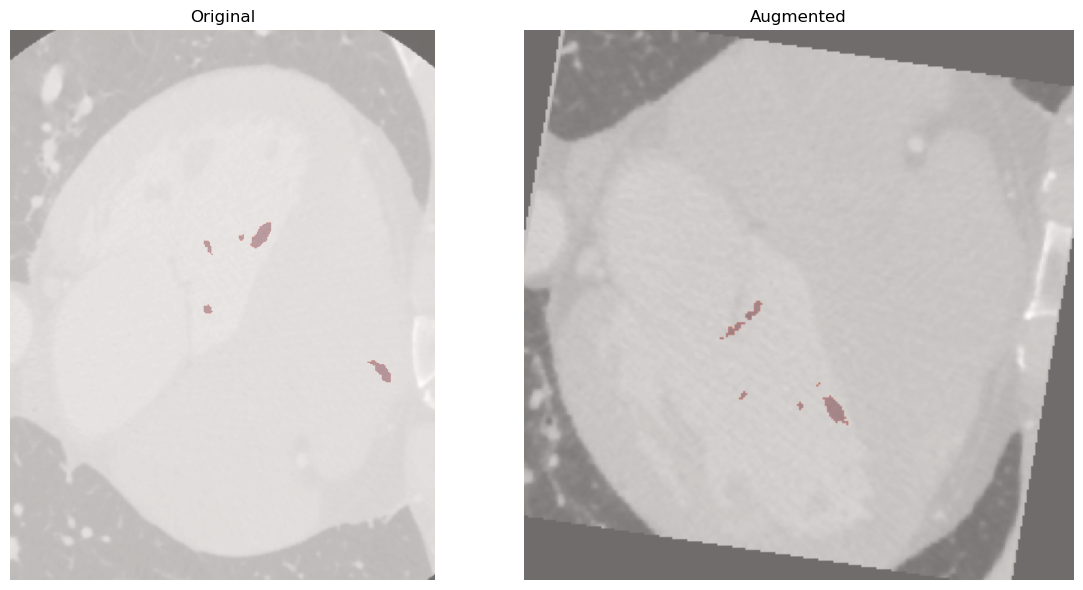

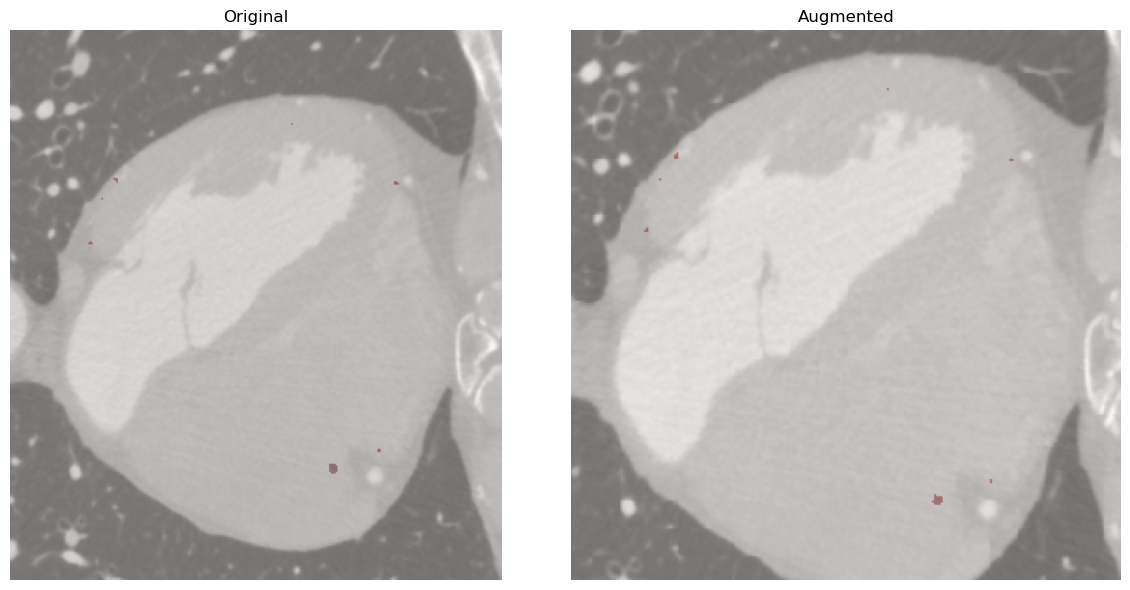

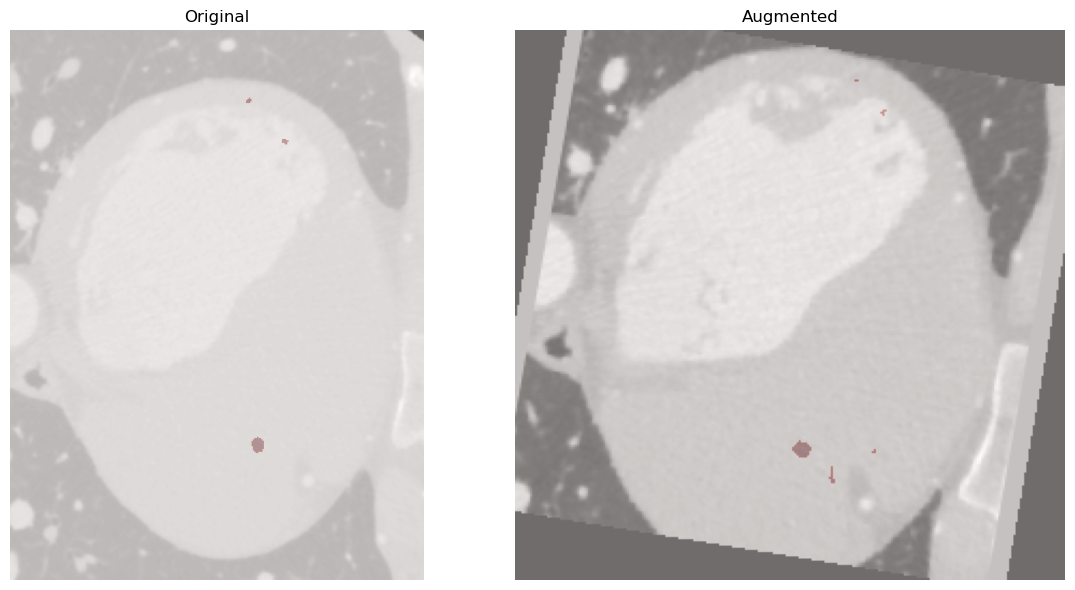

In [37]:
'''visualise image and labels'''

import matplotlib.pyplot as plt
import numpy as np
import torchio as tio

def plot_overlay(image, label, slice_index=None, title=""):
    # Get numpy arrays
    image_np = image.numpy().squeeze()  # Shape: (H, W, D)
    label_np = label.numpy().squeeze()  # Shape: (H, W, D)

    # Pick a middle slice if none provided
    if slice_index is None:
        slice_index = image_np.shape[2] // 2

    # Slice along axial (Z) direction
    img_slice = image_np[:, :, slice_index]
    lbl_slice = label_np[:, :, slice_index]

    # Plot
    plt.imshow(img_slice, cmap='gray', alpha=0.8)
    plt.imshow(lbl_slice, cmap='Reds', alpha=0.3)
    plt.title(title)
    plt.axis('off')

# Pick a sample
sample = sim_datalist['training'][7]
image_path = sample['image']
label_path = sample['label']

# Load originals
original_image = tio.ScalarImage(image_path)
original_label = tio.LabelMap(label_path)

# Resample for alignment
original_label = tio.Resample(original_image, image_interpolation='nearest')(original_label)

# Apply augmentation
aug_image, aug_label = load_and_augment(image_path, label_path)

# Plot side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_overlay(original_image, original_label, title="Original")

plt.subplot(1, 2, 2)
plot_overlay(aug_image, aug_label, title="Augmented")

plt.tight_layout()
plt.show()



# Pick a sample
sample = sim_datalist['training'][6]
image_path = sample['image']
label_path = sample['label']

# Load originals
original_image = tio.ScalarImage(image_path)
original_label = tio.LabelMap(label_path)

# Resample for alignment
original_label = tio.Resample(original_image, image_interpolation='nearest')(original_label)

# Apply augmentation
aug_image, aug_label = load_and_augment(image_path, label_path)

# Plot side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_overlay(original_image, original_label, title="Original")

plt.subplot(1, 2, 2)
plot_overlay(aug_image, aug_label, title="Augmented")

plt.tight_layout()
plt.show()


# Pick a sample
sample = sim_datalist['training'][5]
image_path = sample['image']
label_path = sample['label']

# Load originals
original_image = tio.ScalarImage(image_path)
original_label = tio.LabelMap(label_path)

# Resample for alignment
original_label = tio.Resample(original_image, image_interpolation='nearest')(original_label)

# Apply augmentation
aug_image, aug_label = load_and_augment(image_path, label_path)

# Plot side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_overlay(original_image, original_label, title="Original")

plt.subplot(1, 2, 2)
plot_overlay(aug_image, aug_label, title="Augmented")

plt.tight_layout()
plt.show()


# Generate images and labels

In [24]:
#gives an error, doesn't work. The code below this one does work!

import json
import torchio as tio
import random



# Define augmentation transforms
augmentations = [
    tio.RandomFlip(axes=(0, 1, 2), flip_probability=0.5),  # Randomly flip along any axis
    tio.RandomAffine(scales=(0.9, 1.1), degrees=10),       # Random rotation up to 10 degrees
    tio.RandomNoise(std=0.02),                             # Add random noise
    tio.RandomGamma(log_gamma=(-0.3, 0.3)),               # Random contrast change
]

#def apply_augmentation(image_path, label_path):
 #   """Apply random augmentations to the image-label pair."""
  #  subject = tio.Subject(
  # #     image=tio.ScalarImage(image_path),
   #     label=tio.LabelMap(label_path)
   # )
    
   # transform = tio.Compose(random.sample(augmentations, k=random.randint(1, 3)))  # Apply 1 to 3 random transforms
   # transformed = transform(subject)

#    return transformed


import torchio as tio

import torchio as tio

def apply_augmentation(image_path, label_path, num_augmentations=3):
    """
    Applies a set of augmentations to an image and its label multiple times.
    
    Args:
    - image_path: Path to the input image.
    - label_path: Path to the corresponding label.
    - num_augmentations: The number of augmented versions to generate.

    Returns:
    - A list of transformed subjects, each containing an image and label.
    """
    augmented_images = []

    # Load the subject
    subject = tio.Subject(
        image=tio.ScalarImage(image_path),
        label=tio.LabelMap(label_path)
    )

    # Resample label to match image
    # resample_transform = tio.Resample(subject["image"])  
    # subject = resample_transform(subject)

    # Define augmentations (can add more here as needed)
    # augmentations = [
    #     tio.RandomAffine(),
    #     tio.RandomElasticDeformation(),
    #     # Add more augmentations if required
    # ]
    
    # Apply augmentations multiple times
    for i in range(num_augmentations):
        transform = tio.Compose(augmentations)  # Apply the augmentations
        transformed = transform(subject)

        # Store transformed image and label (with new names for each augmentation)
        aug_image_path = f"aug_image_{i+1}.nii.gz"
        aug_label_path = f"aug_label_{i+1}.nii.gz"

        # Save the augmented images and labels
        transformed["image"].save(aug_image_path)
        transformed["label"].save(aug_label_path)

        # Append to list of augmented images
        augmented_images.append({
            "augmented_image": aug_image_path,
            "augmented_label": aug_label_path
        })

    return augmented_images


import os
import json
import torchio as tio

# Ensure the output directory exists
output_dir = "Data_augmentation"
os.makedirs(output_dir, exist_ok=True)

# Define output JSON file
output_json = os.path.join(output_dir, "augmented_data.json")

# Initialize list to store data
augmented_data_list = []

# Loop through the training dataset
for i, item in enumerate(sim_datalist["training"]):
    original_image_path = item["image"]
    original_label_path = item["label"]

    # Apply augmentation
    transformed_subjects = apply_augmentation(original_image_path, original_label_path)

    # Define augmented image file paths
    aug_image_path = os.path.join(output_dir, f"aug_image_{i}.nii.gz")
    aug_label_path = os.path.join(output_dir, f"aug_label_{i}.nii.gz")

    # Save the augmented images (use `.path` to get the file path)
    transformed_subject["image"].save(aug_image_path)  # Save the augmented image
    transformed_subject["label"].save(aug_label_path)  # Save the augmented label

    # Store both original & augmented data in the list
    augmented_data_list.append({
        "fold": item.get("fold", 0),  # Keep the fold if it exists
        "original_image": original_image_path,
        "original_label": original_label_path,
        "augmented_image": aug_image_path,
        "augmented_label": aug_label_path
    })

# Save the JSON file
with open(output_json, "w") as f:
    json.dump(augmented_data_list, f, indent=4)

print(f"Augmented dataset saved in {output_json}")



RuntimeError: More than one value for "spatial_shape" found in subject images:
{'image': (367, 329, 216), 'label': (366, 323, 208)}

In [22]:
import json
import torchio as tio
import random



# Define augmentation transforms
augmentations = [
    tio.RandomFlip(axes=(0, 1, 2), flip_probability=0.5),  # Randomly flip along any axis
    tio.RandomAffine(scales=(0.9, 1.1), degrees=10),       # Random rotation up to 10 degrees
    tio.RandomNoise(std=0.02),                             # Add random noise
    tio.RandomGamma(log_gamma=(-0.3, 0.3)),               # Random contrast change
]

#def apply_augmentation(image_path, label_path):
 #   """Apply random augmentations to the image-label pair."""
  #  subject = tio.Subject(
  # #     image=tio.ScalarImage(image_path),
   #     label=tio.LabelMap(label_path)
   # )
    
   # transform = tio.Compose(random.sample(augmentations, k=random.randint(1, 3)))  # Apply 1 to 3 random transforms
   # transformed = transform(subject)

#    return transformed


import torchio as tio

def apply_augmentation(image_path, label_path):
    subject = tio.Subject(
        image=tio.ScalarImage(image_path),
        label=tio.LabelMap(label_path)
    )

    # Resample label to match image
    #resample_transform = tio.Resample(subject["image"])  
    #subject = resample_transform(subject)

    # Apply augmentations
    augmentations = [tio.RandomAffine(), tio.RandomElasticDeformation()]  
    transform = tio.Compose(augmentations)  
    transformed = transform(subject)

    return transformed

# Apply augmentation to training data
augmented_data = []

# Loop through the training dataset
for i, item in enumerate(sim_datalist["training"]):
    original_image_path = item["image"]
    original_label_path = item["label"]

    # Apply augmentation
    transformed_subject = apply_augmentation(original_image_path, original_label_path)

    # Define augmented image file paths
    aug_image_path = os.path.join(output_dir, f"aug_image_{i}.nii.gz")
    aug_label_path = os.path.join(output_dir, f"aug_label_{i}.nii.gz")

    # Save the augmented images
    transformed_subject["image"].save(aug_image_path)
    transformed_subject["label"].save(aug_label_path)

    # Store both original & augmented data
    augmented_data_list.append({
        "fold": item.get("fold", 0),  # Keep the fold if it exists
        "original_image": original_image_path,
        "original_label": original_label_path,
        "augmented_image": aug_image_path,
        "augmented_label": aug_label_path
    })

# Save the JSON file
with open(output_json, "w") as f:
    json.dump(augmented_data_list, f, indent=4)

print(f"Augmented dataset saved in {output_json}")



# for item in sim_datalist["training"]:
#     transformed_subject = apply_augmentation(item["image"], item["label"])
#     augmented_data.append({
#         "image": transformed_subject["image"].path,
#         "label": transformed_subject["label"].path,
#     })

# # Print results
# print("Augmented Data:", augmented_data)



RuntimeError: More than one value for "spatial_shape" found in subject images:
{'image': (367, 329, 216), 'label': (366, 323, 208)}

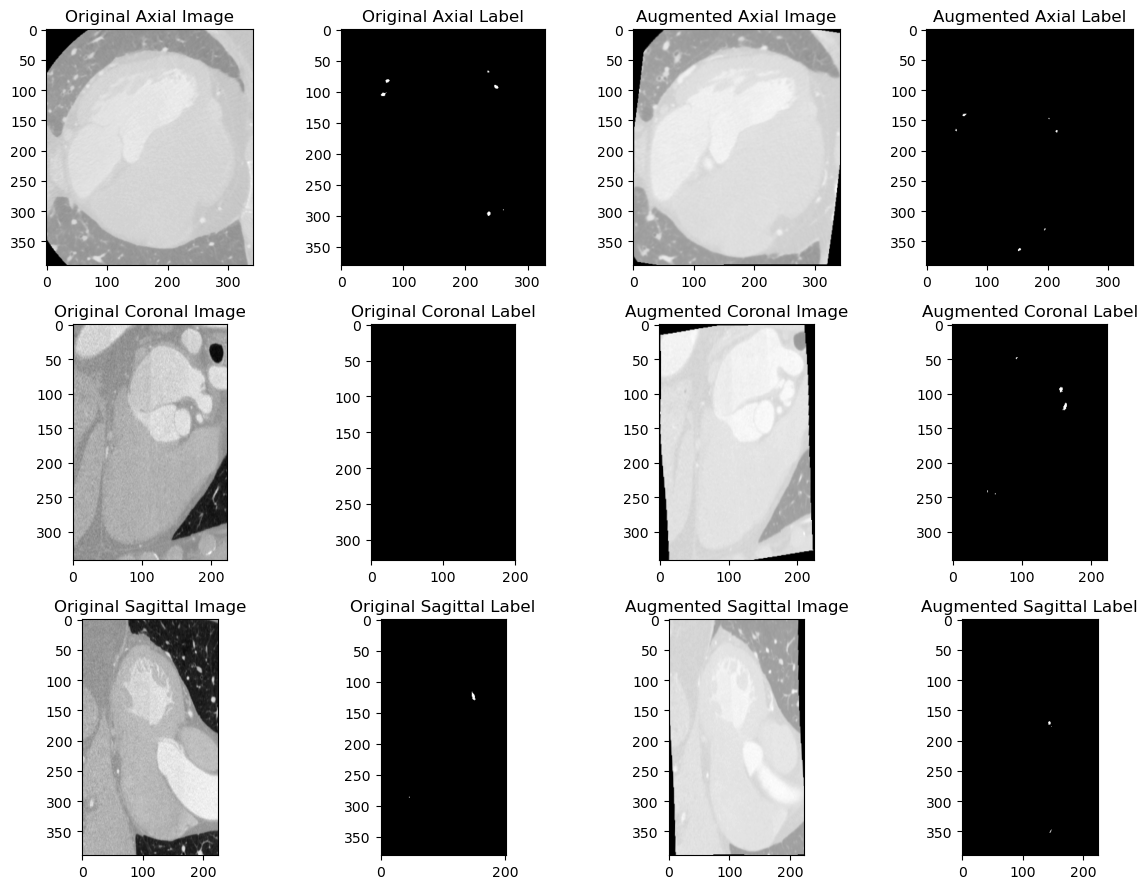

In [18]:
# Apply augmentation to one sample for visualization
sample = sim_datalist["training"][2]  # Take the first training sample
original_subject = tio.Subject(
    image=tio.ScalarImage(sample["image"]),
    label=tio.LabelMap(sample["label"])
)
transformed_subject = apply_augmentation(sample["image"], sample["label"])

# Convert to NumPy arrays for visualization
original_image_np = original_subject["image"].data.numpy()[0]  # Extract first channel
original_label_np = original_subject["label"].data.numpy()[0]
aug_image_np = transformed_subject["image"].data.numpy()[0]
aug_label_np = transformed_subject["label"].data.numpy()[0]

# Select 3 middle slices along different planes
slice_x = original_image_np.shape[0] // 2  # Coronal
slice_y = original_image_np.shape[1] // 2  # Sagittal
slice_z = original_image_np.shape[2] // 2  # Axial

# Plot Original vs. Augmented slices
fig, axes = plt.subplots(3, 4, figsize=(12, 9))

slices = {
    "Axial": (slice_z, 2), 
    "Coronal": (slice_x, 0), 
    "Sagittal": (slice_y, 1)
}

for i, (plane, (slice_idx, axis)) in enumerate(slices.items()):
    # Original Image & Label
    axes[i, 0].imshow(np.take(original_image_np, slice_idx, axis=axis), cmap="gray")
    axes[i, 0].set_title(f"Original {plane} Image")

    axes[i, 1].imshow(np.take(original_label_np, slice_idx, axis=axis), cmap="gray")
    axes[i, 1].set_title(f"Original {plane} Label")

    # Augmented Image & Label
    axes[i, 2].imshow(np.take(aug_image_np, slice_idx, axis=axis), cmap="gray")
    axes[i, 2].set_title(f"Augmented {plane} Image")

    axes[i, 3].imshow(np.take(aug_label_np, slice_idx, axis=axis), cmap="gray")
    axes[i, 3].set_title(f"Augmented {plane} Label")

# Layout adjustments
plt.tight_layout()
plt.show()

Original image shape: (1, 356, 344, 184)
Original label shape: (1, 393, 306, 207)
Augmented image shape: (1, 356, 344, 184)
Augmented label shape: (1, 356, 344, 184)


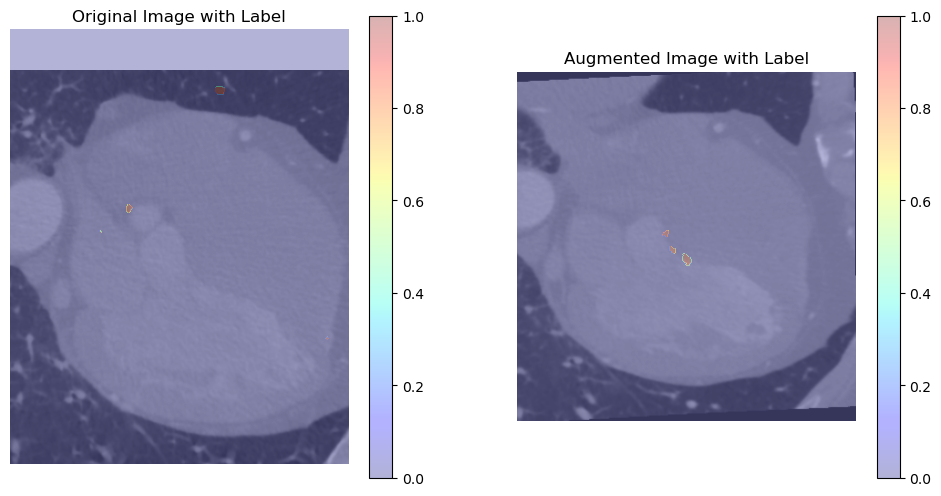

In [ ]:
'''random visualisation, run this one'''

import json
import random
import torchio as tio
import matplotlib.pyplot as plt
import numpy as np

# Load the augmented data from the JSON file
with open('Data_augmentation/augmented_data.json', 'r') as f:
    augmented_data = json.load(f)

# Choose a random sample from the dataset
random_sample = random.choice(augmented_data)

# Load original and augmented images and labels
original_image_path = random_sample["original_image"]
original_label_path = random_sample["original_label"]
augmented_image_path = random_sample["augmented_image"]
augmented_label_path = random_sample["augmented_label"]

original_image = tio.ScalarImage(original_image_path).data.numpy()
original_label = tio.LabelMap(original_label_path).data.numpy()
augmented_image = tio.ScalarImage(augmented_image_path).data.numpy()
augmented_label = tio.LabelMap(augmented_label_path).data.numpy()

# Check the shape of the image and label to ensure correct indexing
print(f"Original image shape: {original_image.shape}")
print(f"Original label shape: {original_label.shape}")
print(f"Augmented image shape: {augmented_image.shape}")
print(f"Augmented label shape: {augmented_label.shape}")


# Load the images using torchio (or nibabel for nifti files)
original_image = tio.ScalarImage(original_image_path).data.numpy()
original_label = tio.LabelMap(original_label_path).data.numpy()

augmented_image = tio.ScalarImage(augmented_image_path).data.numpy()
augmented_label = tio.LabelMap(augmented_label_path).data.numpy()

# Show 2 slices from the 3D volumes (this assumes the images are 3D)
slice_idx = random.randint(0, original_image.shape[3] - 1)  # Random slice index

# Plotting function to overlay label on image
def plot_image_with_overlay(image, label, slice_idx, title=""):
    # Remove singleton dimension and get the slice
    image_slice = image[0, :, :, slice_idx]  # Assuming the shape is (1, height, width, depth)
    label_slice = label[0, :, :, slice_idx]  # Same here for label

    plt.imshow(image_slice, cmap='gray', origin='lower', alpha=0.7)
    plt.imshow(label_slice, cmap='jet', origin='lower', alpha=0.3)  # Overlay label in jet color
    plt.title(title)
    plt.colorbar()
    plt.axis('off')

# Plot original image with label overlay
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_image_with_overlay(original_image, original_label, slice_idx, "Original Image with Label")

# Plot augmented image with label overlay
plt.subplot(1, 2, 2)
plot_image_with_overlay(augmented_image, augmented_label, slice_idx, "Augmented Image with Label")

# Show the plots
plt.show()
